In [1]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서

In [2]:
# Load the stored data object
save_file = './write/ddk2_pp_merge.h5ad'
adata = sc.read_h5ad(save_file)

In [3]:
adata

AnnData object with n_obs × n_vars = 1983 × 31056
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1'

In [4]:
adata.raw = adata


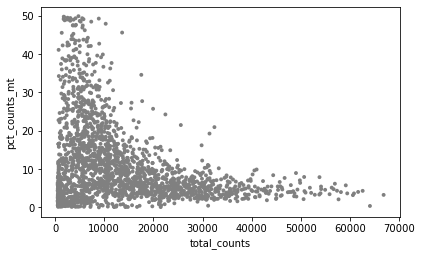

In [5]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')


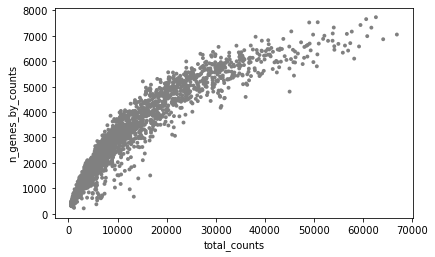

In [6]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [7]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [16]:
sc.pp.log1p(adata)



In [17]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


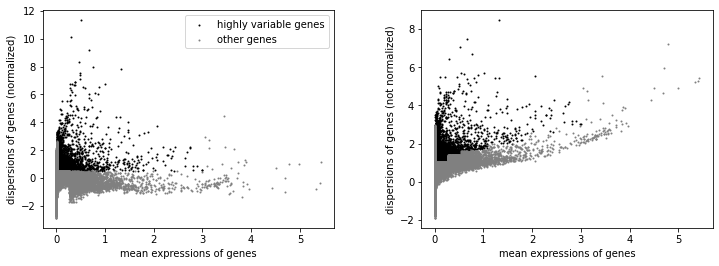

In [18]:
sc.pl.highly_variable_genes(adata)


In [19]:
adata.var

,gene_ids,feature_types,mt,ribo,n_cells_by_counts-0,mean_counts-0,pct_dropout_by_counts-0,total_counts-0,n_cells_by_counts-1,mean_counts-1,pct_dropout_by_counts-1,total_counts-1,highly_variable,means,dispersions,dispersions_norm
Xkr4,ENSMUSG00000051951,Gene Expression,False,False,14,0.015741,98.703704,17.0,31,0.019453,98.370137,37.0,True,3.172601e-02,1.138187,0.591325
Gm1992,ENSMUSG00000089699,Gene Expression,False,False,0,0.000000,100.000000,0.0,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,0.000000
Gm37381,ENSMUSG00000102343,Gene Expression,False,False,0,0.000000,100.000000,0.0,1,0.000526,99.947424,1.0,False,4.688193e-04,-0.072693,-0.783333
Rp1,ENSMUSG00000025900,Gene Expression,False,False,0,0.000000,100.000000,0.0,12,0.008412,99.369085,16.0,False,5.310144e-03,0.257326,-0.408677
Sox17,ENSMUSG00000025902,Gene Expression,False,False,236,0.671296,78.148148,725.0,191,0.387487,89.957939,737.0,True,3.889768e-01,1.807983,1.234852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vmn2r122,ENSMUSG00000096730,Gene Expression,False,False,0,0.000000,100.000000,0.0,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,0.000000
CAAA01147332.1,ENSMUSG00000095742,Gene Expression,False,False,38,0.036111,96.481481,39.0,81,0.043638,95.741325,83.0,True,7.011552e-02,1.775017,1.314291
GFP,GFP,Gene Expression,False,False,0,0.000000,100.000000,0.0,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,0.000000
Malat1-1,Malat1,Gene Expression,False,False,282,0.399074,73.888889,431.0,338,0.254469,82.229232,484.0,False,3.741985e-01,1.396773,0.445759


In [20]:
adata = adata[:, adata.var.highly_variable]


In [21]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])


regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:12)


In [22]:
sc.pp.scale(adata, max_value=10)


In [23]:
sc.tl.pca(adata, svd_solver='arpack')


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [25]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,sample,batch
AAACGCTGTTACGTAC-1-0,3773,14619.0,1535.0,10.500034,4066.0,27.813118,3773,14619.0,control,0
AAAGAACAGGAATGTT-1-0,5431,26600.0,1638.0,6.157895,3024.0,11.368421,5431,26600.0,control,0
AAAGAACTCGCAATGT-1-0,1866,8961.0,3829.0,42.729607,1729.0,19.294722,1866,8961.0,control,0
AAAGGGCGTATCGTTG-1-0,6677,54966.0,2532.0,4.606484,14823.0,26.967579,6677,54966.0,control,0
AAAGGTAAGTTACTCG-1-0,3619,15158.0,2652.0,17.495710,3672.0,24.224831,3619,15158.0,control,0
...,...,...,...,...,...,...,...,...,...,...
TTTGGAGGTAGCGCTC-1-1,4522,21746.0,2098.0,9.647752,5864.0,26.965878,4522,21746.0,ko,1
TTTGGTTTCCGATAGT-1-1,5022,24521.0,861.0,3.511276,3706.0,15.113576,5022,24521.0,ko,1
TTTGTTGAGCAATTAG-1-1,1893,6652.0,2945.0,44.272400,729.0,10.959110,1893,6652.0,ko,1
TTTGTTGCACGTACTA-1-1,4639,18593.0,1081.0,5.814016,4237.0,22.788147,4639,18593.0,ko,1


In [28]:
adata.varm

AxisArrays with keys: PCs

In [37]:
da = pd.DataFrame(adata.uns)

In [38]:
da

,0
0,log1p
1,hvg
2,pca


In [41]:
da[0]

0    log1p
1      hvg
2      pca
Name: 0, dtype: object

In [42]:
sc.pl.pca_loadings

<function scanpy.plotting._tools.pca_loadings(adata: anndata._core.anndata.AnnData, components: Union[str, Sequence[int], NoneType] = None, include_lowest: bool = True, show: Union[bool, NoneType] = None, save: Union[str, bool, NoneType] = None)>

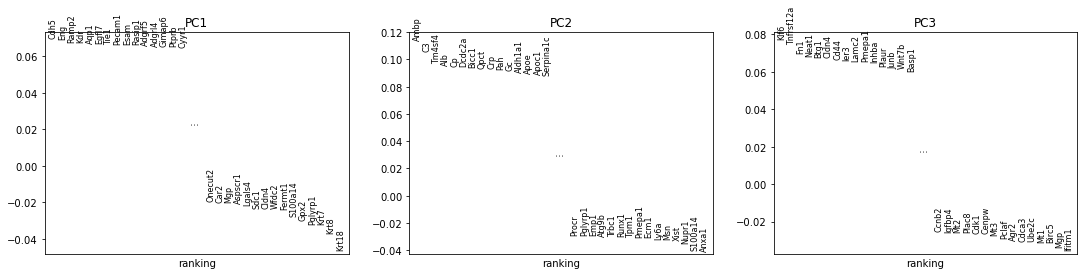

In [43]:
sc.pl.pca_loadings(adata, components = '1,2,3')


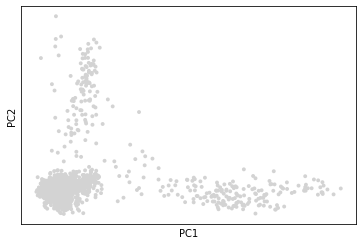

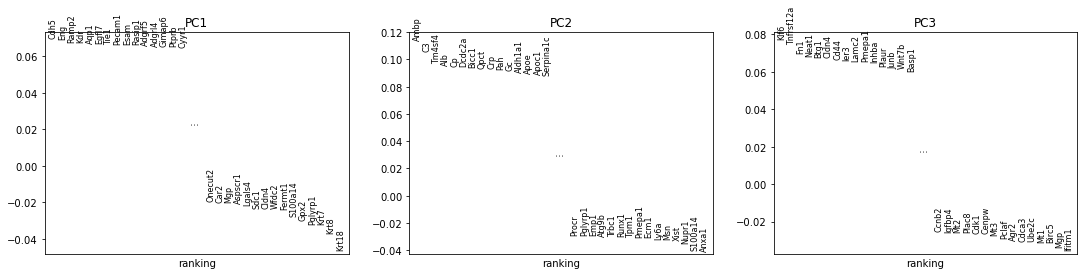

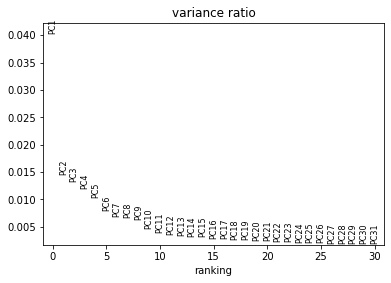

In [45]:
sc.pl.pca_overview(adata)


In [ ]:
#make a list of genes that has higher score of ranking in each PC 

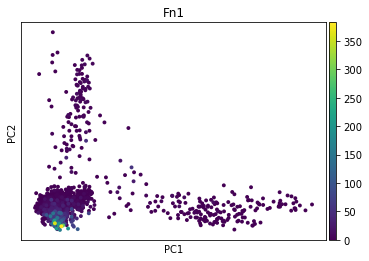

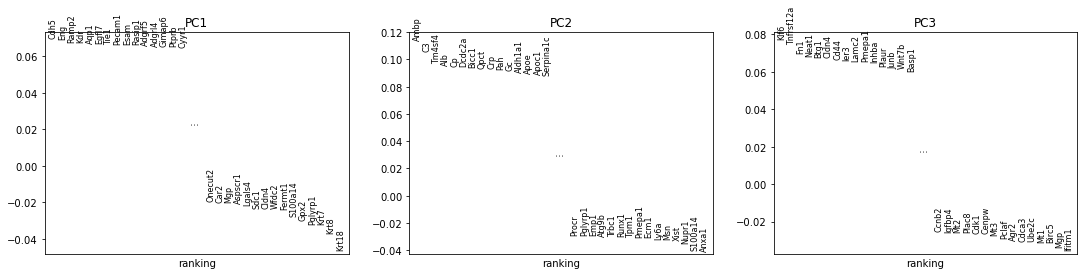

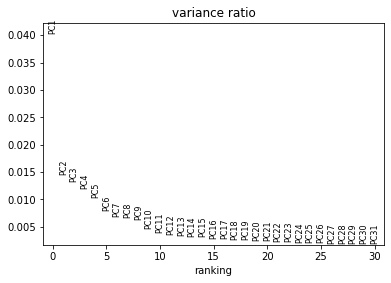

In [49]:
sc.pl.pca_overview(adata, color="Fn1")


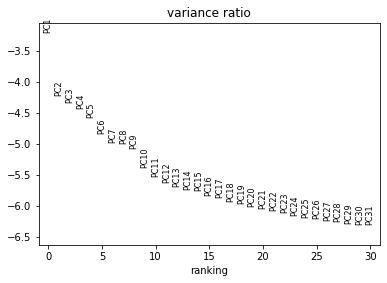

In [50]:
sc.pl.pca_variance_ratio(adata, log=True)


In [51]:
adata


AnnData object with n_obs × n_vars = 1983 × 4892
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [52]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [55]:
sc.tl.umap(adata)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


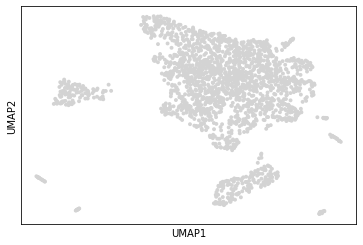

In [56]:
sc.pl.umap(adata)

In [57]:
sc.tl.leiden(adata)


running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


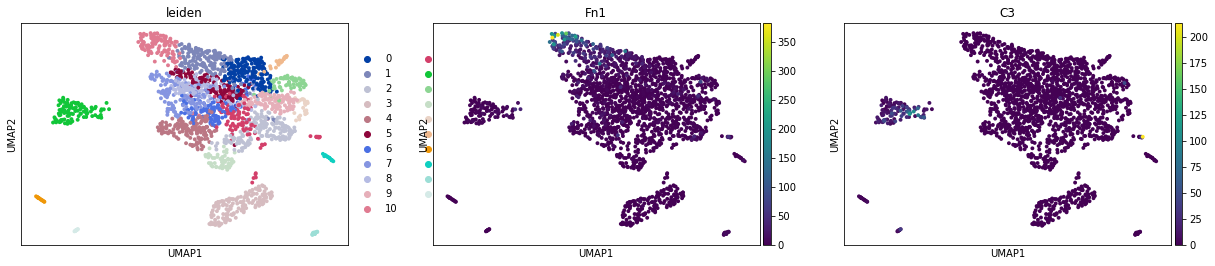

In [58]:
sc.pl.umap(adata, color=['leiden', 'Fn1', 'C3'])


In [59]:
sc.tl.louvain(adata)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


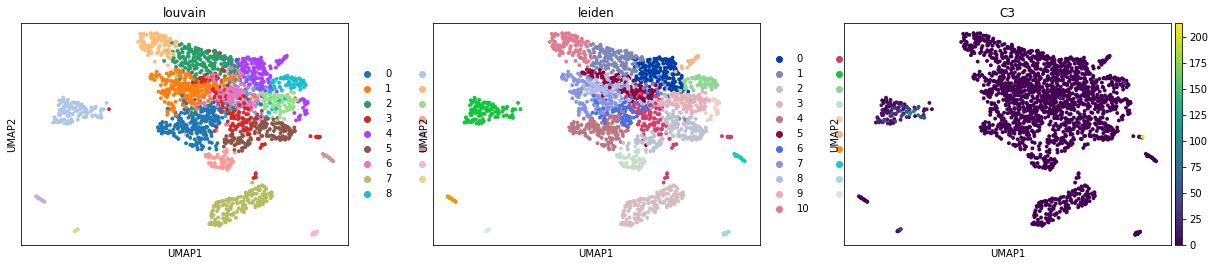

In [60]:
sc.pl.umap(adata, color=['louvain', 'leiden', 'C3'])


In [61]:
sc.tl.leiden(adata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

running Leiden clustering
    finished: found 21 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 25 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


In [64]:
sc.tl.leiden(adata, resolution = 0.3, key_added = "leiden_0.3")


running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:00)


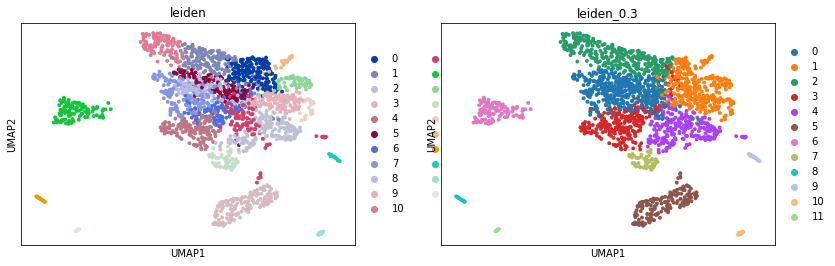

In [65]:
sc.pl.umap(adata, color=['leiden', 'leiden_0.3'])


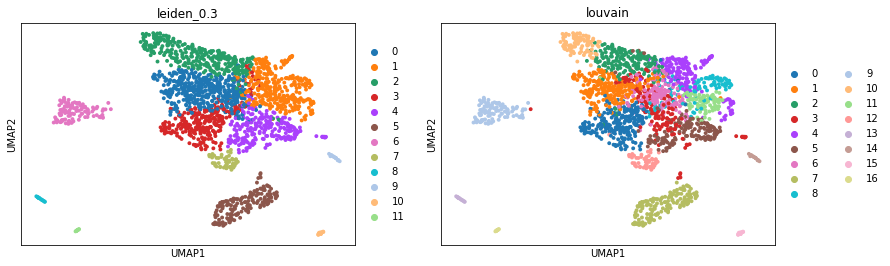

In [67]:
sc.pl.umap(adata, color=['leiden_0.3', 'louvain'])


In [73]:
adata.X

array([[-0.12170026, -0.42184883, -0.31455323, ..., -0.6433627 ,
        -0.19256939, -0.5503081 ],
       [-0.08913502, -0.50549984, -0.27268824, ..., -0.23213899,
        -0.1769421 ,  1.0426294 ],
       [-0.22218227, -0.30950853, -0.49395576, ..., -0.50373733,
         0.02939347, -0.49404457],
       ...,
       [-0.2304491 , -0.29168332,  4.6493025 , ..., -0.2905119 ,
         0.0317467 , -0.5009445 ],
       [-0.10174575,  0.448288  ,  1.314991  , ..., -0.29185656,
        -0.21205187,  1.425466  ],
       [-0.06860627, -0.55849934, -0.24638896, ..., -0.7329318 ,
        -0.16659626, -0.4762164 ]], dtype=float32)

In [68]:
sc.tl.rank_genes_groups(adata, 'leiden_0.3', method='t-test')


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


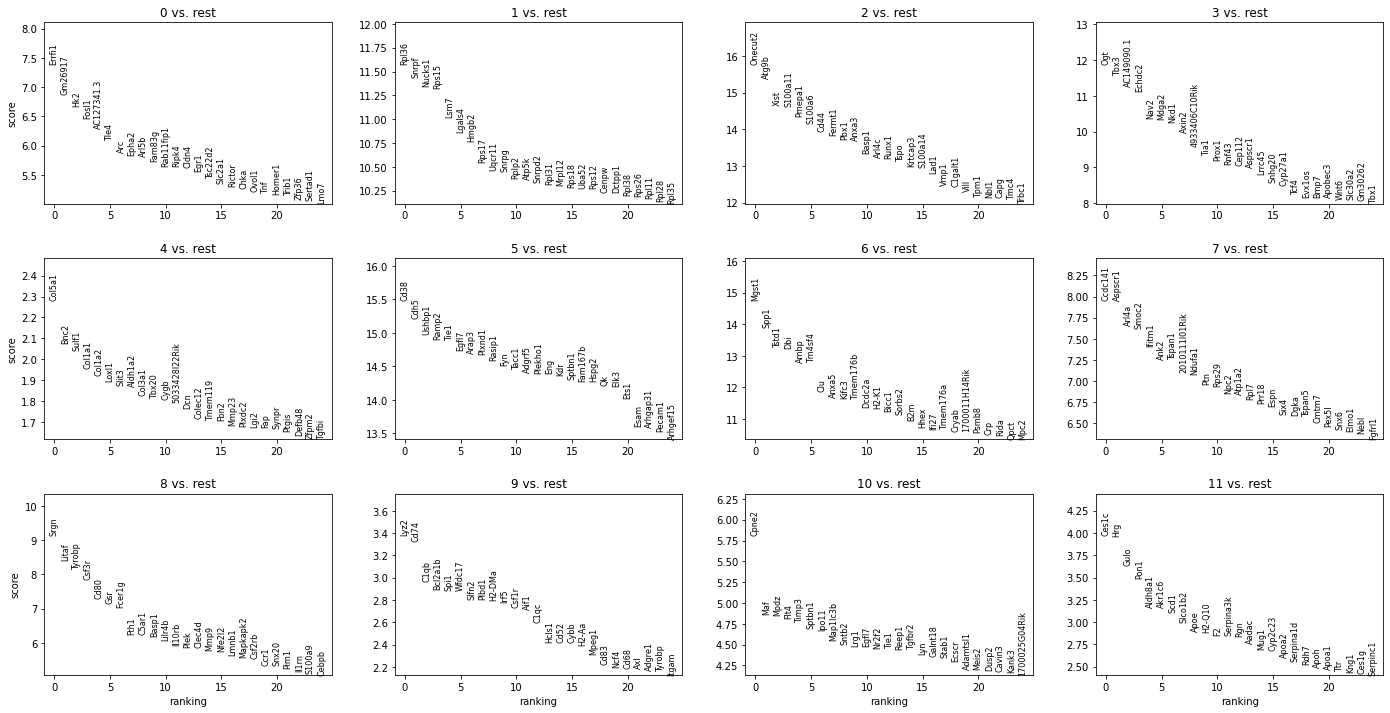

In [69]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


In [70]:
sc.settings.verbosity = 2  # reduce the verbosity


ranking genes
    finished (0:00:05)


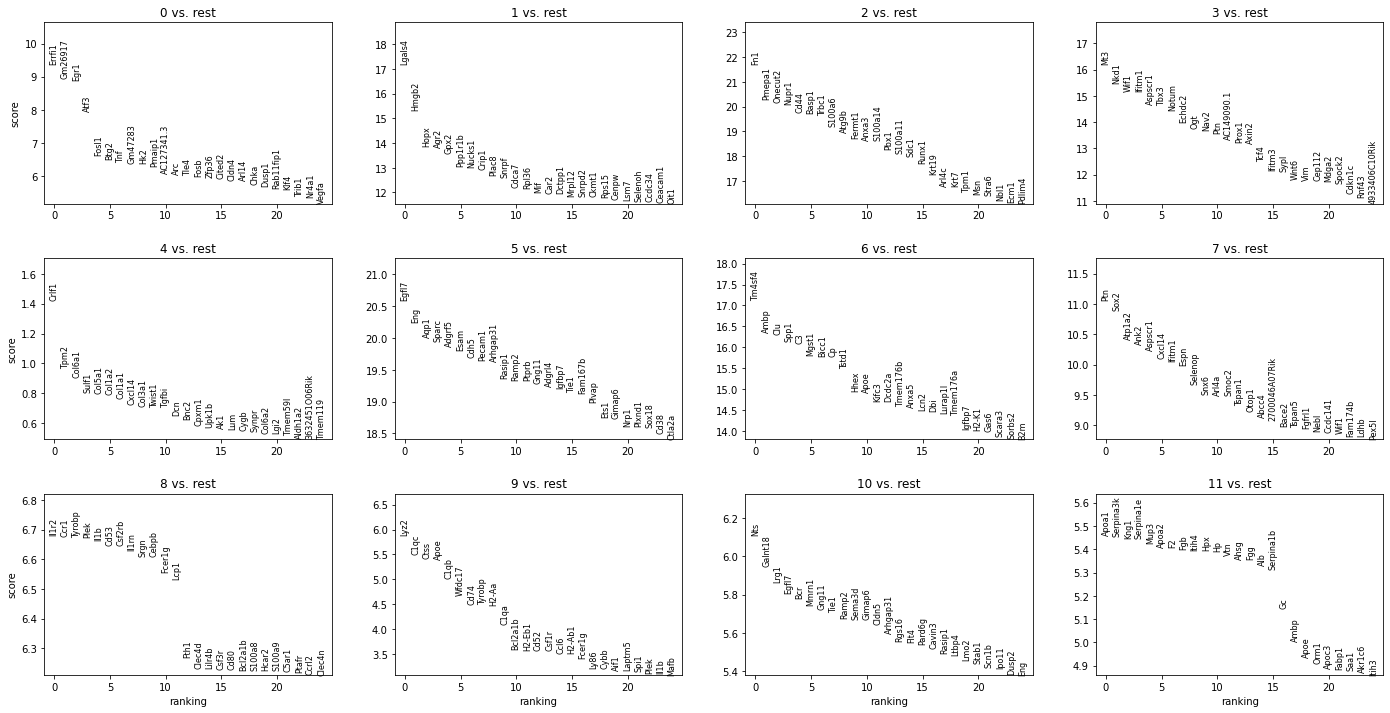

In [71]:
sc.tl.rank_genes_groups(adata, 'leiden_0.3', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished (0:00:13)


/Users/minsuyoo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


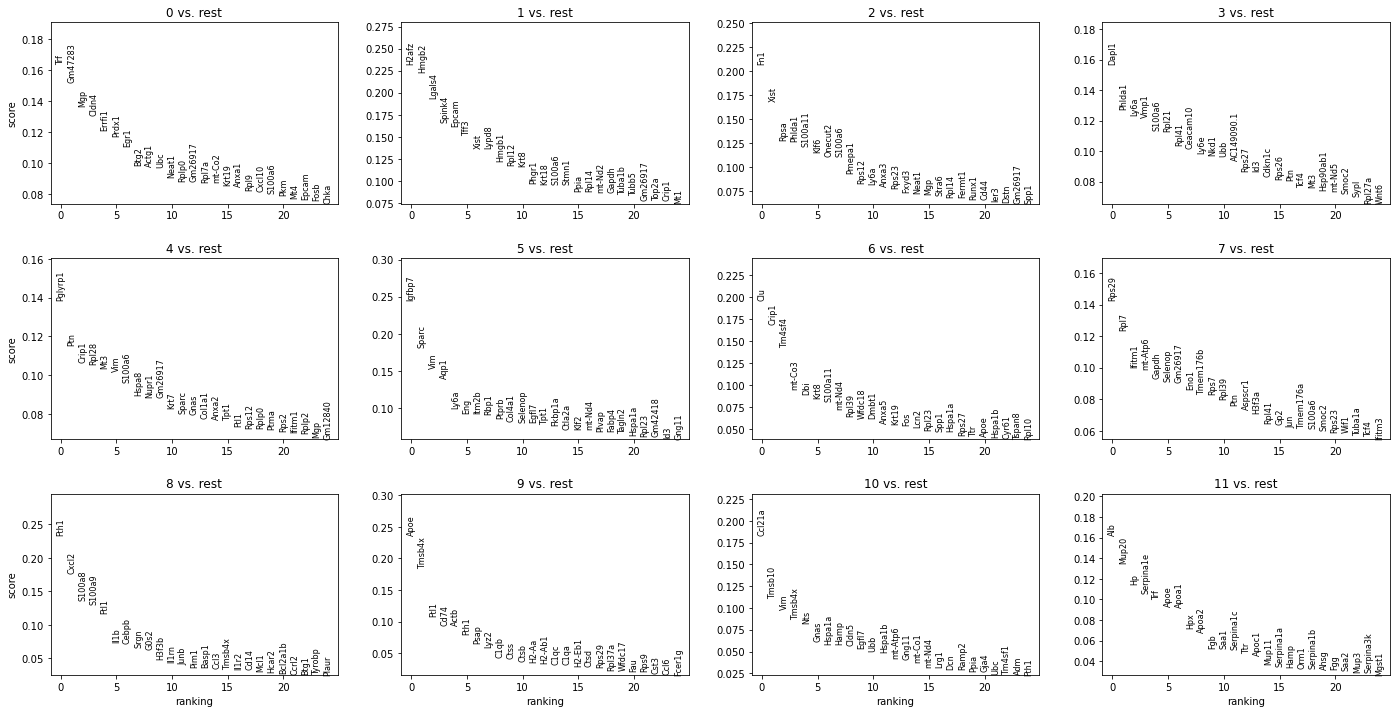

In [74]:
sc.tl.rank_genes_groups(adata, 'leiden_0.3', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [75]:
adata.uns

OverloadedDict, wrapping:
	{'log1p': {'base': None}, 'hvg': {'flavor': 'seurat'}, 'pca': {'params': {'zero_center': True, 'use_highly_variable': True}, 'variance': array([172.02692  ,  62.21608  ,  56.1786   ,  50.92646  ,  43.677074 ,
        33.974903 ,  29.220531 ,  28.624899 ,  26.741793 ,  19.70087  ,
        16.810627 ,  15.280471 ,  14.3522   ,  13.736603 ,  13.415326 ,
        12.372122 ,  12.02682  ,  11.392984 ,  10.949223 ,  10.401962 ,
        10.104699 ,   9.825757 ,   9.493791 ,   9.055125 ,   8.788113 ,
         8.592504 ,   8.278353 ,   8.191666 ,   7.981657 ,   7.8734136,
         7.7675357,   7.6291337,   7.601226 ,   7.5556116,   7.3531137,
         7.3061147,   7.25814  ,   7.2165103,   7.15554  ,   7.13795  ,
         7.0363035,   7.018467 ,   6.95785  ,   6.9126134,   6.8449802,
         6.7993464,   6.7654023,   6.748802 ,   6.7057667,   6.6506658],
      dtype=float32), 'variance_ratio': array([0.04021598, 0.0145447 , 0.01313328, 0.01190545, 0.01021071,
       0

ranking genes
    finished (0:00:05)


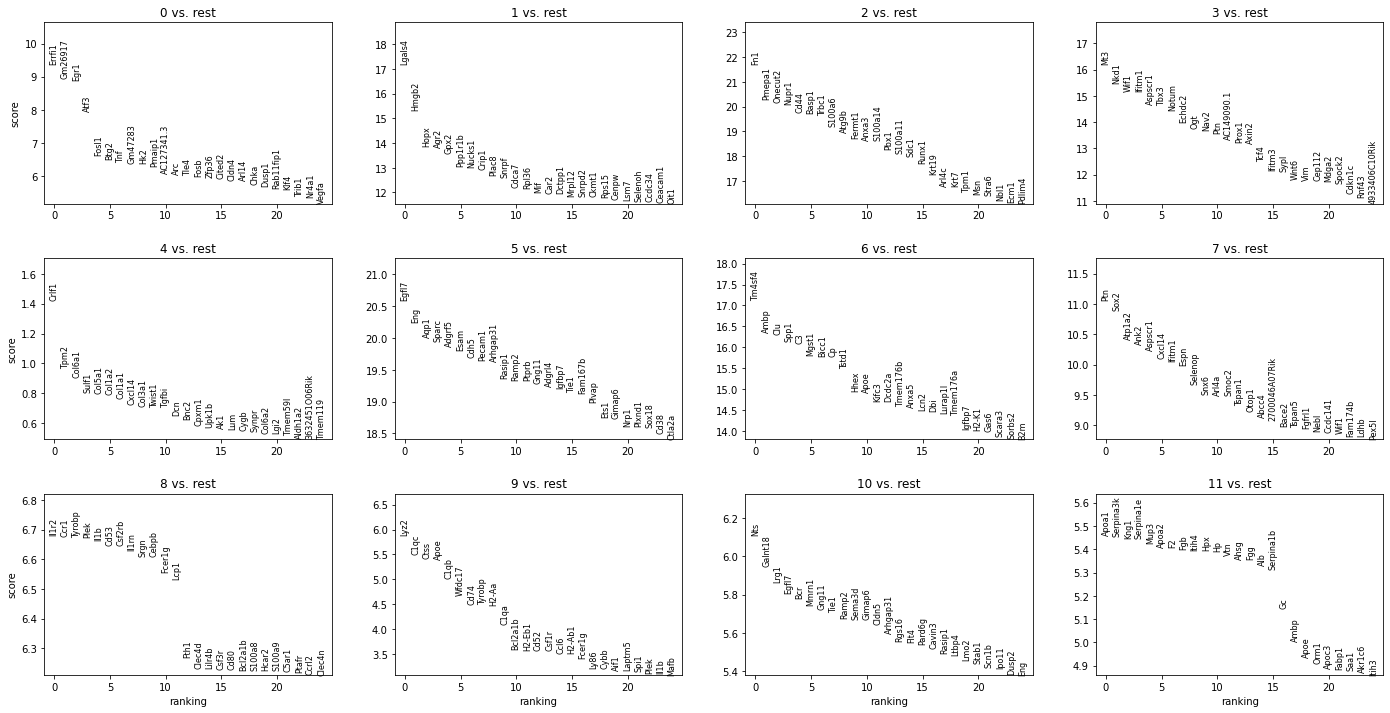

In [76]:
sc.tl.rank_genes_groups(adata, 'leiden_0.3', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [78]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)


,0,1,2,3,4,5,6,7,8,9,10,11
0,Errfi1,Lgals4,Fn1,Mt3,Crlf1,Egfl7,Tm4sf4,Ptn,Il1r2,Lyz2,Nts,Apoa1
1,Gm26917,Hmgb2,Pmepa1,Nkd1,Tpm2,Eng,Ambp,Sox2,Ccr1,C1qc,Galnt18,Serpina3k
2,Egr1,Hopx,Onecut2,Wif1,Col6a1,Aqp1,Clu,Atp1a2,Tyrobp,Ctss,Lrg1,Kng1
3,Atf3,Agr2,Nupr1,Ifitm1,Sulf1,Sparc,Spp1,Ank2,Plek,Apoe,Egfl7,Serpina1e
4,Fosl1,Gpx2,Cd44,Aspscr1,Col5a1,Adgrf5,C3,Aspscr1,Il1b,C1qb,Bcr,Mup3
5,Btg2,Ppp1r1b,Basp1,Tbx3,Col1a2,Esam,Mgst1,Cxcl14,Cd53,Wfdc17,Mmrn1,Apoa2
6,Tnf,Nucks1,Trbc1,Notum,Col1a1,Cdh5,Bicc1,Ifitm1,Csf2rb,Cd74,Gng11,F2
7,Gm47283,Crip1,S100a6,Echdc2,Cxcl14,Pecam1,Cp,Espn,Il1rn,Tyrobp,Tie1,Fgb
8,Hk2,Plac8,Atg9b,Ogt,Col3a1,Arhgap31,Tstd1,Selenop,Srgn,H2-Aa,Ramp2,Itih4
9,Pmaip1,Snrpf,Fermt1,Nav2,Twist1,Rasip1,Hhex,Snx6,Cebpb,C1qa,Sema3d,Hpx


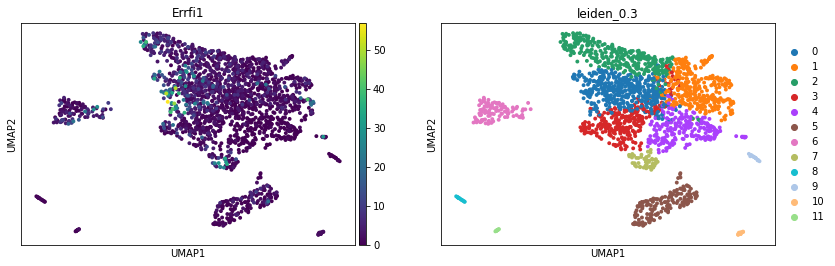

In [84]:
sc.pl.umap(adata, color=['Errfi1', 'leiden_0.3'])


In [85]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,7_n,7_p,8_n,8_p,9_n,9_p,10_n,10_p,11_n,11_p
0,Errfi1,6.869215e-21,Lgals4,3.091888e-66,Fn1,1.545829e-104,Mt3,4.762965e-59,Crlf1,0.153783,...,Ptn,1.799300e-28,Il1r2,2.378891e-11,Lyz2,4.049709e-09,Nts,1.007390e-09,Apoa1,4.781440e-08
1,Gm26917,3.837783e-19,Hmgb2,4.033376e-53,Pmepa1,1.301956e-91,Nkd1,6.074828e-54,Tpm2,0.333477,...,Sox2,1.188180e-27,Ccr1,2.438395e-11,C1qc,3.593267e-08,Galnt18,2.728785e-09,Serpina3k,4.886918e-08
2,Egr1,5.458308e-19,Hopx,8.223349e-44,Onecut2,1.126553e-90,Wif1,3.860503e-52,Col6a1,0.364644,...,Atp1a2,2.212602e-25,Tyrobp,2.468691e-11,Ctss,5.750844e-08,Lrg1,4.550801e-09,Kng1,5.088821e-08
3,Atf3,1.908346e-15,Agr2,1.553047e-43,Nupr1,5.697357e-90,Ifitm1,4.954774e-52,Sulf1,0.418693,...,Ank2,4.576004e-25,Plek,2.510950e-11,Apoe,6.311236e-08,Egfl7,6.298592e-09,Serpina1e,5.104683e-08
4,Fosl1,3.198988e-11,Gpx2,6.199328e-42,Cd44,6.495835e-87,Aspscr1,7.439490e-49,Col5a1,0.424296,...,Aspscr1,1.353929e-24,Il1b,2.678916e-11,C1qb,5.066549e-07,Bcr,7.407453e-09,Mup3,5.717581e-08
5,Btg2,7.115534e-11,Ppp1r1b,5.061447e-39,Basp1,1.426466e-86,Tbx3,1.535854e-48,Col1a2,0.426706,...,Cxcl14,5.662011e-24,Cd53,2.965319e-11,Wfdc17,2.853005e-06,Mmrn1,9.273404e-09,Apoa2,6.293617e-08
6,Tnf,1.268220e-10,Nucks1,9.964451e-39,Trbc1,6.506835e-86,Notum,2.032539e-47,Col1a1,0.442852,...,Ifitm1,8.663623e-24,Csf2rb,3.002009e-11,Cd74,6.830154e-06,Gng11,1.031122e-08,F2,6.381775e-08
7,Gm47283,1.680286e-10,Crip1,2.248598e-38,S100a6,3.587001e-82,Echdc2,1.888373e-44,Cxcl14,0.468986,...,Espn,1.584587e-23,Il1rn,3.378648e-11,Tyrobp,6.989913e-06,Tie1,1.151074e-08,Fgb,6.705018e-08
8,Hk2,1.687084e-10,Plac8,5.716796e-37,Atg9b,3.871144e-80,Ogt,3.044852e-43,Col3a1,0.474697,...,Selenop,3.903869e-22,Srgn,3.813054e-11,H2-Aa,7.184763e-06,Ramp2,1.359693e-08,Itih4,6.798751e-08
9,Pmaip1,3.059481e-10,Snrpf,1.550367e-36,Fermt1,2.910246e-78,Nav2,1.360112e-42,Twist1,0.478362,...,Snx6,1.969712e-21,Cebpb,3.877720e-11,C1qa,4.231982e-05,Sema3d,1.402829e-08,Hpx,6.861944e-08
